In [18]:
# Configure matplotlib.
%matplotlib inline

# Unclutter the display.
import pandas as pd; pd.set_option('max_columns', 6)
import geopandas as gpd
import geoplot as gplt

In [19]:
data = gpd.read_file("data/WFDSSHistoricFirePerimeters_2020.shp")
data.head()

,OBJECTID,INCIDENT,FIRE_YEAR_,...,SHAPE_Leng,SHAPE_Area,geometry
0,7348,VICS PEAK,2020,...,1.812773,0.005747,"MULTIPOLYGON (((-107.45431 33.61050, -107.4542..."
1,7349,Cub,2020,...,1.832110,0.008422,"MULTIPOLYGON (((-108.53574 33.31908, -108.5358..."
2,7350,Bearpaw Mountain,2020,...,0.215212,0.000498,"POLYGON ((-151.02800 63.89567, -151.02730 63.8..."
3,7351,Wood Springs 2,2020,...,0.586789,0.005197,"MULTIPOLYGON (((-109.28103 35.96077, -109.2764..."
4,7352,Sheenjek River,2020,...,0.521669,0.003228,"POLYGON ((-144.41281 67.21048, -144.41259 67.2..."


In [28]:
import geoplot.crs as gcrs
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

,state,adm1_code,population,geometry
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."
6,California,USA-3521,37253956,"POLYGON ((-114.35490 34.46467, -114.16597 34.2..."
10,Oregon,USA-3525,3831074,"POLYGON ((-117.02825 42.00002, -117.02825 41.9..."


<GeoAxesSubplot:>

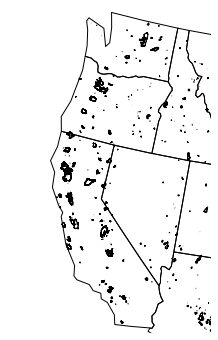

In [41]:
extent = contiguous_usa.query("state == ['California', 'Oregon', 'Washington']").total_bounds
ax = gplt.polyplot(
    contiguous_usa,
    projection=gcrs.AlbersEqualArea()
)
gplt.polyplot(data, ax=ax, figsize=(20, 20), extent=extent, projection=gcrs.AlbersEqualArea())